# Disaster Tweets

Neil Chen, University of Colorado Boulder

Mar 30, 2025

Firstly I learned a bit NLP by following this tutorial: <https://www.kaggle.com/code/philculliton/nlp-getting-started-tutorial>



In [21]:
import numpy as np
import pandas as pd
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from matplotlib import pyplot as plt

## Exploratory Data Analysis (EDA)

In [3]:
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [7]:
train_df[train_df["target"] == 0]["text"].values[2]

'Summer is lovely'

In [8]:
train_df[train_df["target"] == 1]["text"].values[3]

'13,000 people receive #wildfires evacuation orders in California '

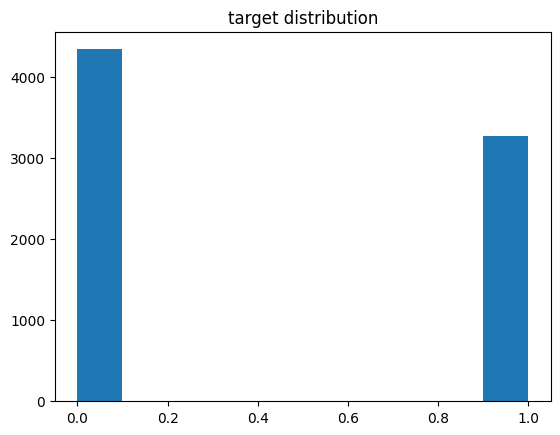

In [23]:
train_df['target'].value_counts(normalize=True)

plt.hist(train_df['target'])
plt.title('target distribution')
plt.show()

Text(0.5, 1.0, 'Top 10 Keywords by Count')

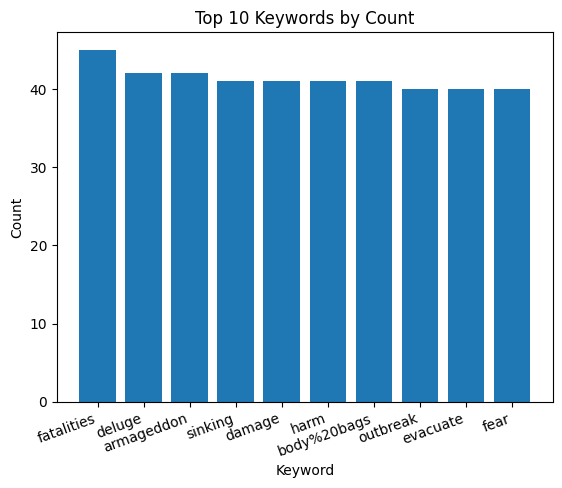

In [45]:
# Check keywords
top_10_keywords = train_df['keyword'].value_counts().head(10)
plt.bar(top_10_keywords.index.tolist(), top_10_keywords.values.tolist())
plt.xlabel('Keyword')
plt.ylabel('Count')
plt.xticks(rotation=20, ha='right') # Rotate the x labels to avoid collision
plt.title('Top 10 Keywords by Count')


In [26]:
train_df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [35]:
top_10_locations = train_df.location.value_counts().head(10)

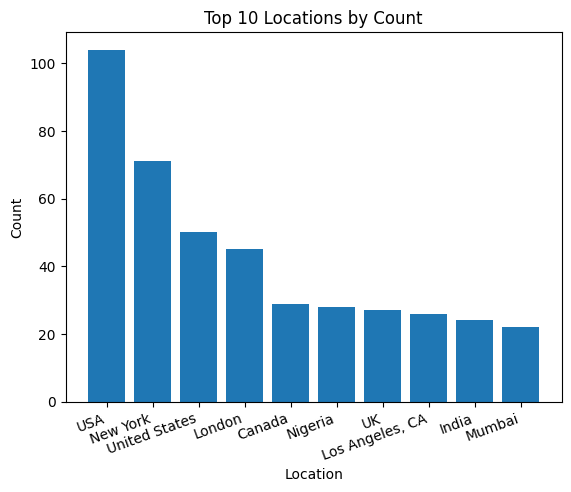

In [43]:
plt.bar(top_10_locations.index.tolist(), top_10_locations.values.tolist() )
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=20, ha='right') # Rotate the x labels to avoid collision
plt.title('Top 10 Locations by Count')
plt.show()

In [12]:
# Building vectors
count_vectorizer = feature_extraction.text.CountVectorizer()

# get counts for the first 5 tweets in the data
example_train_vectors = count_vectorizer.fit_transform(train_df["text"][0:5])

In [11]:
import sklearn
sklearn.__version__

'1.6.1'

In [13]:
print(example_train_vectors[0].todense().shape)
print(example_train_vectors[0].todense())

(1, 54)
[[0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0
  0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0]]


In [14]:
train_vectors = count_vectorizer.fit_transform(train_df["text"])
test_vectors = count_vectorizer.transform(test_df["text"])

In [15]:
clf = linear_model.RidgeClassifier()

In [16]:
scores = model_selection.cross_val_score(clf, train_vectors, train_df["target"], cv=3, scoring="f1")
scores

array([0.59453669, 0.5642787 , 0.64082434])

In [17]:
clf.fit(train_vectors, train_df["target"])

RidgeClassifier()

In [18]:
clf.predict(test_vectors)

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)